In [1]:
import sys
import os
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re

import src.io as sio
import src.qudi_fit_wrapper as qft
import src.helpers as shp
import src.fitting as sft

plt.style.use('seaborn')

In [2]:
DATA_FOLDER = "20220405_FR0612-F2-3G6"
DATA_FOLDERPATH, FIGURE_FOLDERPATH = sio.get_data_and_figure_paths(DATA_FOLDER)

src.io :: INFO :: qudiamond folderpath is Z:/Data\20220405_FR0612-F2-3G6\


In [4]:
os.listdir(DATA_FOLDERPATH)

['Nanonis-Session.ini',
 '2022',
 'frq-sweep-qnami-before-bonding001.dat',
 'LaserNormalizing.xlsx',
 'LaserNormalizing.csv']

In [5]:
df = pd.read_csv(os.path.join(DATA_FOLDERPATH, "LaserNormalizing.csv"))

In [7]:
df.columns

Index(['GUI power (mW)', 'Obj Power (mW)', 'Obj power (uW)', 'Counts'], dtype='object')

src.io :: INFO :: Saving 'laser_normalization' to 'Z:/Data_Analysis\20220405_FR0612-F2-3G6'


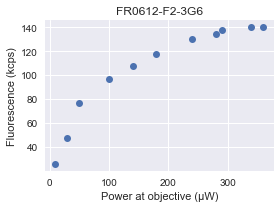

In [19]:
fig, ax = plt.subplots(figsize=(4, 3))

ax.plot(df['Obj Power (mW)'] * 1e3, df['Counts'], "o")
ax.set_ylabel("Fluorescence (kcps)")
ax.set_xlabel("Power at objective (μW)")
ax.set_title("FR0612-F2-3G6")
fig.tight_layout()

sio.save_figures("laser_normalization", folder=FIGURE_FOLDERPATH)